---
# <div align="center"><font color='green'> COSC 2753 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Week 5 Lab Exercises: Logistic Regression and Parameter Finetuning</font></div>
---

# Introduction

During the last couple of weeks we learned about how to read data, do exploratory data analysis (EDA) and prepare data for training and training a ML model. However, we did not specifically discuss the typical ML pipeline. In this lab, we will go through a typical ML model development process using a classification task as an example. Specifically, we will learn more about the machine learning pipeline, including examining and performing basic data cleaning. We then examine how to perform logistic regression, learn two basic metrics to evaluate this, and perform basic parameter tuning to demonstrate how it can be done. We will apply it to predict whether NBA rookies will play five years or more.

The lab assumes that you have completed the labs for week 2-4. If you havent yet, please do so before attempting this lab.

> **<span style="font-size:1.5em;">⚠</span> Warning: Starting this week, we will progressively provide less code, and would like you to use previous labs and what you know to perform the tasks. This will help you to become proficient at this.**

The lab can be executed on either your own machine (with anaconda installation) or computer lab. 
- Please refer canvas for instructions on installing anaconda python


## Objective

- Continue to familiarise with Python and other ML packages
- Perform basic data preparation
- Practice performing logistic regression
- Learn how to perform basic parameter tuning


## Dataset


In this lab, we will be using a dataset of NBA rookies, some of their stats and trying to predict whether they will still be playing after 5 years. You can download the data from Canvas.
 
First, ensure the data file `nbaRookies.csv` is located within the Jupyter workspace. 

- If you are on the local machine copy the data file (`nbaRookies.csv`) to your current folder.

In this course we mostly use datasets that are collected by a third party. If you are interested in collecting your own data for your project, some useful information can be found at: [Introduction to Constructing Your Dataset](https://developers.google.com/machine-learning/data-prep/construct/construct-intro) 

# Problem Formulation

The first step in developing a model is to formulate the problem in a way that we can apply machine learning. To reiterate, the `task` in the nbaRookies dataset is to predict whether NBA rookies will play five years or more, using some attributes of rookies. 

<span style="font-size:1.5em;">�</span> Observe the data and see if there is a pattern that would allow us to predict whether NBA rookies will play five years or more using the attributes given? You can use the observations from the EDA for this.

<span style="font-size:1.5em;">�</span> What category does the task belong to?
> <span style="font-size:1em;">✔</span> **Task category:** 
> - supervised, univariate/multivariate regression 

> - We should use the insights gained from observing the data (EDA) in selecting the performance measure. e.g. are there outliers in target?

# Data Pre-processing

We will first study how to perform some basic data pre-processing. First import pandas, sklearn, numpy and matplotlib.pyplot. You may also want to import seaborn for drawing more beautiful graphs.

### Load dataset 

We want to load the dataset ‘nbaRookies.csv’ into a Pandas dataframe (call it nbaDf). Remember to check if your dataframe was loaded correctly by print out the first few records or output some summary information about the dataset.

Start a new Jupyter notebook session. Load the dataset `nbaRookies.csv`in nbaDf.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## TODO
nbaDf = pd.read_csv("nbaRookies.csv")##, delimiter="\s+")
print(nbaDf)


                 Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0      Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1     Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2      JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3         Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4         Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   
...               ...  ..   ...  ...  ...  ...   ...      ...  ...   ...  ...   
1335      Chris Smith  80  15.8  4.3  1.6  3.6  43.3      0.0  0.2  14.3  ...   
1336      Brent Price  68  12.6  3.9  1.5  4.1  35.8      0.1  0.7  16.7  ...   
1337     Marlon Maxey  43  12.1  5.4  2.2  3.9  55.0      0.0  0.0   0.0  ...   
1338  Litterial Green  52  12.0  4.5  1.7  3.8  43.9      0.0  0.2  10.0  ...   
1339        Jon Barry  47  11.7  4.4  1.6  4.4  36.9      0.4  1.3  33.3  ...   

      FTA   FT%  OREB  DREB

### Data pre-processing

Let's plot a series of histogram to understand the distribution of the data more. Is there anything that captures your interest?


In [3]:
nbaDf.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


<font color='green'> The target column is **TARGET_5Yrs** and all the other columns are attributes. </font>

In [4]:
nbaDf.shape

(1340, 21)

In [5]:
nbaDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

#### Let's plot a series of histogram to understand the distribution of the data more. Is there anything that captures your interest?


<Figure size 6400x6400 with 0 Axes>

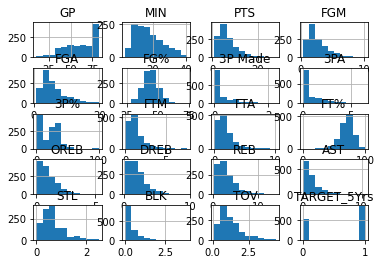

In [14]:
plt.figure(figsize=(40, 40), dpi=160)
nbaDf.hist()
plt.show()

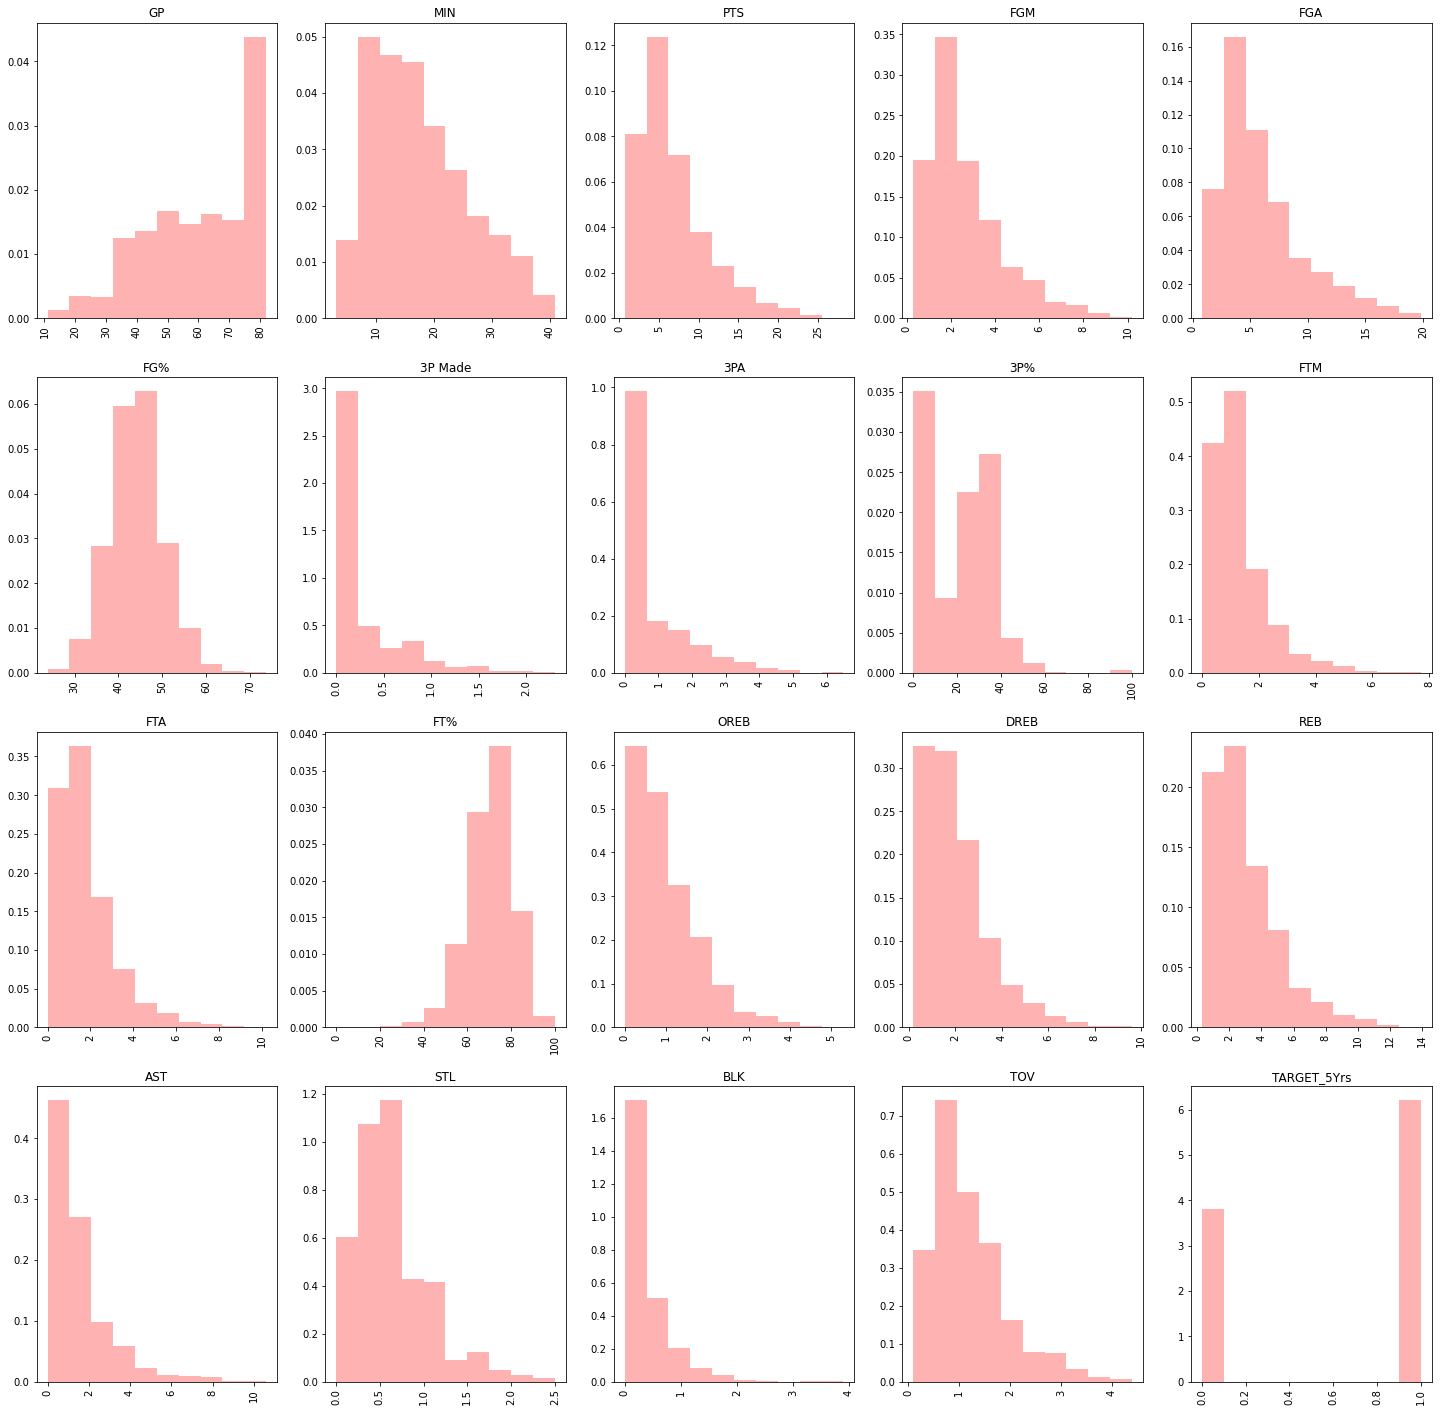

In [17]:
plt.figure(figsize=(25,25))
for i, col in enumerate(nbaDf.columns[1:]):
    plt.subplot(4,5,i+1)
    plt.hist(nbaDf[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

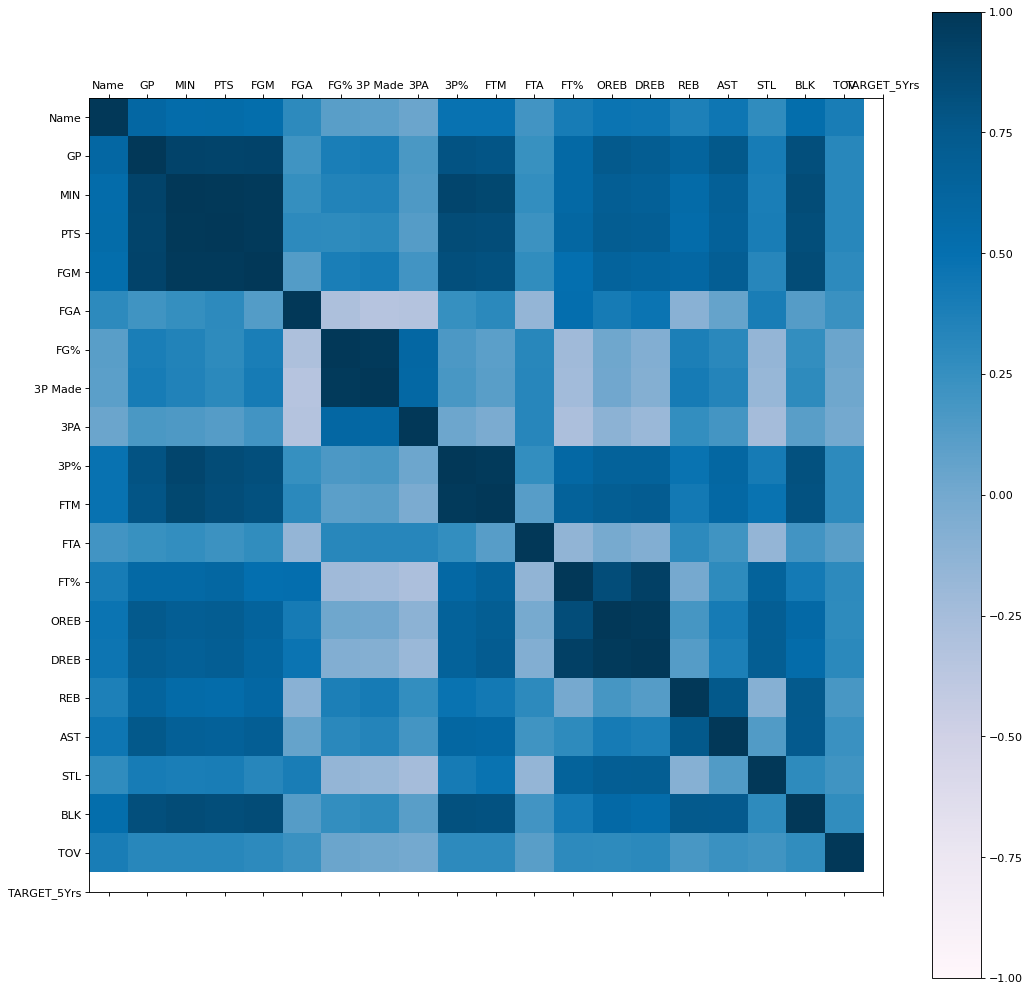

In [33]:
correlation = nbaDf.corr()
fig = plt.figure(figsize=(16, 16), dpi=80)
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,21,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(nbaDf.columns)
ax.set_yticklabels(nbaDf.columns)
plt.show()

In [6]:
nbaDf.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - We can see that the `3P%` column has only 1329 items while other columns all have 1340 items.


If there are missing values in the dataset, they are generally represented as NaN Values.

If we tried to run this with a classifier, we will find it will complaint about NaN values. Let's examine them:

In [19]:
import pandas as pd
pd.isna(nbaDf)

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


That outputs the whole dataframe and entries with True means the value is NaN or None. Given the size of the dataframe, it is hard to visualise it. Please check up the reference for isna() at https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html (Links to an external site.).

Knowing that the function isna() produces a dataframe, can you find a way to summarise how many rows that contain missing data? What are the column(s) that contain missing data, and how many rows? Next, slice the nbaDf dataframe to examine the rows that have missing data.

There are several ways to deal with this, but in this case, we can set the missing data to zeros. Please use the built-in function fillna() of pandas to do this.

This essentially fills all NaN entries with 0 (remember to check the documentation for details of the method). There is another useful function to deal with NaN and missing values called interpolate, that tries to infer values – again check the documentation for details. Another option is to drop the row/instance if it appears the instance might be erroneous or there is no good way to fill or infer.

In [30]:
pd.isna(nbaDf).sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

The `3P%` column has 11 NaN values. We can find which instances/rows this corresponds to:

In [31]:
nbaDf[pd.isna(nbaDf).any(axis=1)]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


<span style="font-size:1.5em;">�</span> What are the possible actions we can take?

> <span style="font-size:1em;">✔</span> **Actions:** 
> - We can remove the above rows from the dataset. This will lead to loss of some information as we will lose the other attribute information in those rows.
> - We can replace the missing values with zero (or the mean of that column with missing values). Need to see if this is reasonable for a given attribute, using nbaDf.fillna(0) or nbaDf.fillna(<mean_value>)
> - We can use another feature(s) to predict the missing values and use that. 

**For this problem** we can observe that the `3P%` and the `FTM` (or `MIN`) has a very strong correlation (See EDA results that appear before). Therefore we can use the value of the `FTM` to replace the missing values of `3P%`.
Generally we might have to train a ML model to predict the missing attributes (x: `FTM` , y: `3P%`). However for this problem we can even directly replace the missing mode values without building a model.

In [34]:
nbaDf.loc[pd.isna(nbaDf['3P%']), '3P%'] = nbaDf.loc[pd.isna(nbaDf['3P%']), 'FTM']

Check the data again after fill-in NaN values

In [35]:
pd.isna(nbaDf).sum()

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

## Setting up training and testing data

The final task in this section is to set up the feature/attribute data and the column we are predicting ‘TARGET_5Yrs’. We have done this in the previous lab, please do that now.

Similar to last week and we discuss in lectures about evaluation, we will divide our data into a number of testing datasets.

What we want to do is to use the training (data)set to construct the model, then use the validation set to tune the parameters of the model. Then once the parameters + model are tuned, we evaluate it on the testing set. This reduces the risk that we overfit if we use the testing set to tune the parameters (something we will talk about in lectures).

Scikit-learn doesn’t have a function to split the data into the three sets. Instead, we can call it twice! First, lets split into training and testing dataset, as per last week (remember to import the relevant packages):



In [42]:
nba_X = nbaDf.drop(['Name','TARGET_5Yrs'], axis=1)
nba_Y = nbaDf[['TARGET_5Yrs']]

In [43]:
print(nba_X.shape)
print(nba_Y.shape)

(1340, 19)
(1340, 1)


In [50]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(____, ____, test_size=_______)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y .shape)

NameError: name '____' is not defined

This will split data into a training set consisting of 80% of the data, and testing the remaining 20%.
Fill in the blank please!!!!

In [52]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(nba_X, nba_Y, test_size=0.2,shuffle=True)
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y .shape)

(1072, 19)
(268, 19)
(1072, 1)
(268, 1)


Now, from the training set, we need to generate the validation set. Continue to further split the data into 60% new training set and 20% validation:

In [53]:
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.25,shuffle=True )
print(train_X.shape)
print(val_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(val_Y.shape)
print(test_Y .shape)

(804, 19)
(268, 19)
(268, 19)
(804, 1)
(268, 1)
(268, 1)


> **<font color='red'><span style="font-size:1.5em;">☞</span> Why we use 0.25 instead of 0.2 as the previous statement???</font>**

> **<font color='green'><span style="font-size:1.5em;">!!!</span> Now we are almost ready to perform some classification via logistic regression.</font>**

## Baseline model

We need to select a baseline mode to do this task. I am going to select `regularised polynomial logistic regression` for this example.

*There are better models than this, however we only know logistic regression technique that can be used for this problem at the moment, therefore out choices are limited and the decision is simple.* If we had other options, we need to use our knowledge on those techniques and  the EDA to select the best base model. 

The polynomial model is justified because in the EDA we can see that a non-linear decision boundary can separate the classes. regularisation is justified because we have correlated attributes and in EDA we also had some features where a linear decision boundary looked appropriate. 

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(3)
poly.fit(train_X)
train_X = poly.transform(train_X)
test_X = poly.transform(test_X)
val_X = poly.transform(val_X)

When using polynomial features it is very important to scale the features. Lets do a minmax normalisation. Again you can leverage the EDA to select the appropriate scaling mechanism. 

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)

train_X = scaler.transform(train_X)
val_X = scaler.transform(val_X)
test_X = scaler.transform(test_X)

> **<font color='green'><span style="font-size:1.5em;">!!!</span>Lets check the un-regularised linear model - just to check if everything is in order.</font>**


Ideally we would increase the number of maximum iterations and see if it solves the problem. You will notice a warning saying the max_iter was reached. For now lets ignore the warning. 

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced')

In [60]:
clf.fit(train_X, train_Y.to_numpy().ravel())

/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(class_weight='balanced', max_iter=1000, penalty='none',
                   random_state=0, solver='saga')

### Lets setup some functions to get the performance.

In [62]:
from sklearn.metrics import f1_score

train_pred = clf.predict(train_X)
train_f1 = f1_score(train_Y, train_pred, average='macro')

print("Train F1-Score score: {:.3f}".format(train_f1))


Train F1-Score score: 0.719


Let's see how much the F1-Score for validation step.

In [64]:
val_pred = clf.predict(val_X)
val_f1 = f1_score(val_Y, val_pred, average='macro')

print("Validation F1-Score score: {:.3f}".format(val_f1))

Validation F1-Score score: 0.685


For this task the baseline model achieved good training performance. However we can see a gap between the Train Accuracy and the Validation Accuracy (generalisation GAP). 

**What can we do when there is a GAP between Train and Validation performance?**

- We can apply regularisation. The process is important. we start with a base model and then improve it based on our observations.

## Apply regularisation

When applying regularisation we need to select the lambda value. For this we can use
1. Grid search
2. Random search


We will do grid search in this example. In grid search we establish a set of lambda values in a frid. Selecting the range of lambda values is a process mostly done with trial and error.

Ones we select a set of lambda values, we train a classifier for each of those lambda values and evaluate the performance. 

The standard implementation of logistic regression in Scikit learn includes regularisation, something to prevent overfitting. In scikit-learn, instead of using lambda, it defines C parameter: C = 1.0/lambda, which specifies the amount of weighting placed on minimising the error. C is a "degree of freedom", which a high value of C, the more model will believe in the training dataset, and it will not penalty the theta value. The max_iter is the maximum number of iterations to fit parameters to the model.

In [66]:
lambda_paras = np.logspace(-5, 1, num=25)    # establish the lambda values to test (grid)
# Then search
train_performace = list()
valid_performace = list()
for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
    clf.fit(train_X, train_Y.to_numpy().ravel())        #train the classifier
    
    train_pred = clf.predict(train_X)
    train_f1 = f1_score(train_Y, train_pred, average='macro')   #calculate the train f1-score
    
    val_pred = clf.predict(val_X)
    val_f1 = f1_score(val_Y, val_pred, average='macro')         #calculate the validation f1-score
    
    train_performace.append(train_f1)
    valid_performace.append(val_f1)

Now lets plot the training and validation performance for each lambda value in our lambda values set and see what is the best lambda value. You might have to repeat the process of selecting lambda values if the results are not as expected.

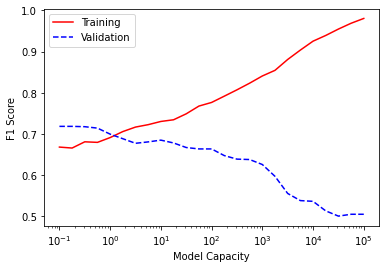

In [67]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [tp for tp in train_performace], 'r-')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras], 
         [vp for vp in valid_performace], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training','Validation'])
plt.show()

<span style="font-size:1.5em;">�</span> What lambda value would you pick as your final value?

We generally pick the lambda value that corresponds to the maximum validation performance and minimum generalisation GAP. In this case it is ?? 

In [69]:
clf = LogisticRegression(penalty='l2', C = 1, 
                             random_state=0, solver='liblinear', max_iter=1000 , 
                             class_weight='balanced')   #create a classifier with a different lambda value
    
clf.fit(train_X, train_Y.to_numpy().ravel())        #train the classifier
    
train_pred = clf.predict(train_X)
train_f1 = f1_score(train_Y, train_pred, average='macro')   #calculate the train f1-score
    
val_pred = clf.predict(val_X)
val_f1 = f1_score(val_Y, val_pred, average='macro')         #calculate the validation f1-score
    
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Validation F1-Score score: {:.3f}".format(val_f1))


Train F1-Score score: 0.691
Validation F1-Score score: 0.699


## Testing the hypothesis (or model)

Lets now assume that we have reached the best performance we can achieve. The next step is to test the hypothesis (or model) we have developed and see if we can trust the model to generalise to unseen data. This is where the test data comes in. 

Lets see how the model performs on test data. Below I have shown some useful techniques that can be used to observe the testing performance. 

In [70]:
from sklearn.metrics import classification_report

test_pred = clf.predict(test_X)
    
print(classification_report(test_Y, test_pred,))

              precision    recall  f1-score   support

         0.0       0.57      0.73      0.64       113
         1.0       0.76      0.60      0.67       155

    accuracy                           0.66       268
   macro avg       0.66      0.67      0.66       268
weighted avg       0.68      0.66      0.66       268



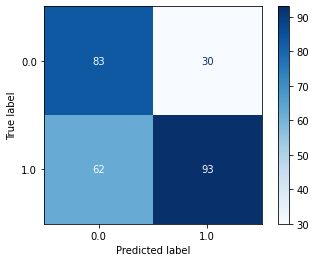

In [71]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(clf, test_X, test_Y,
                                 cmap=plt.cm.Blues)
plt.show()

<span style="font-size:1.5em;">�</span> What is your conclusion? Are you confident about the model?

We should also use model visualisation techniques discussed in last weeks lab to get a better understanding of the model. Since the techniques were introduced last week, it will be an exercise for you.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Use appropriate visualisation techniques to understand the model you have developed.</font>**  

## K-Fold Cross Validation

To understand cross validation lets also use that technique on the same problem.

Again it is good practice to retain a test set to get performance on the final model.


> **<font color='red'><span style="font-size:2.5em;">☞</span> Task: This is your homework!!!!</font>**  

Lets now apply cross validation. Here I am applying 5 fold cross validation. I have reduce the max_iter to 100 in order to complete reduce the computation time for the lab. This is not a good practise, you can increase it as appropriate if you have time.  

In [76]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer

f1_scorer = make_scorer(f1_score, average='weighted')
lambda_paras = np.logspace(-10, 2, num=5)

cv_results = dict()

for lambda_para in lambda_paras:
    clf = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=300, 
                             class_weight='balanced')
    
    scores = cross_validate(clf, train_X, train_Y.to_numpy().ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    
    cv_results[lambda_para] = scores

/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/thienbao/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: Converge

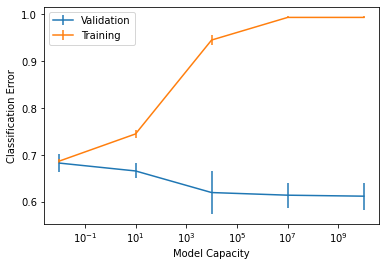

In [77]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()